<a href="https://colab.research.google.com/github/JasonJeng/IDCE30274-Final-Project/blob/main/IDCE30274_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IDCE 30274 Final Project: Domestic flight frequencies figure comparison between two countries**
Zexing Zheng

Python Version 3

This is the final project for the IDCE 30274 S21 computer programming. This project based on existing codes used in Lab 5 Analyzing Airport Data, and modified the codes to make figure comparisons between domestic flight frequencies of two input countries. The resulting figure used log to improve visualization that may become a problem when frequencies differences are to large.

In [2]:
# Upload local script to Colab here. Airports data!
from google.colab import files
uploaded = files.upload()

Saving airports.dat to airports.dat


In [3]:
# Upload local script to Colab here. Routes data!
from google.colab import files
uploaded = files.upload()

Saving routes.dat to routes.dat


In [6]:
name = input('Please enter the first country used in this domestic flight comparison (1/2) ') #create an input variable so this code can better interact with users
name2 = input('Please enter the second country used in this domestic flight comparison (2/2) ') 

Please enter the first country used in this domestic flight comparison (1/2) china
Please enter the second country used in this domestic flight comparison (2/2) japan


**Function for calculating distances based on latitudes and longitudes**

In [4]:
# Copy of geo_distance.py
# Using the Haversine formula for geographic Great Circle Distance
# As per https://en.wikipedia.org/wiki/Haversine_formula

from math import cos,radians,sin,pow,asin,sqrt

def distance(lat1, long1, lat2, long2):
  radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius
  # Lat,long are in degrees but we need radians
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  long1 = radians(long1)
  long2 = radians(long2)

  dlat = lat2-lat1
  dlon = long2-long1

  a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
  distance = 2 * radius * asin(sqrt(a))

  return distance

**First input country**

In [ ]:
import csv # Import required library
f = open("airports.dat")

names = [] # create a list to hold airport names
lat = {} # create dictionaries for both latitudes and longitudes
lon = {} 
for row in csv.reader(f): 
  if row[3] == name.title() and row[1] not in names: # if the fourth column (country) has the same input value... 
    names.append(row[1])
    lat[row[0]] = row[6] # use the airport ID key to combine with the latitudes/longitudes
    lon[row[0]] = row[7]
print(names) # print airport names
print("There are", len(names), "airports in", name.title())

route_dis = [] # create a list to hold distance values calculated by using the function above

r = open("routes.dat")
for row in csv.reader(r): 
  # create a loop to include all rows in the file
  if (row[3] in lat) and (row[5] in lat): # if both airports can be found in the dictionary....
    lat1 = float(lat[row[3]]) # extract lat and lon from the dictionaries
    lat2 = float(lat[row[5]])
    lon1= float(lon[row[3]])
    lon2 = float(lon[row[5]])
    result = float(distance(lat1,lon1,lat2,lon2)) # calculate the result by using the function above
    route_dis.append(result) # store the result (float)


**Second input country**

In [ ]:
# Code for the domestic flights in the second input country
import csv
f = open("airports.dat")
lat_2 = {} # create dictionaries for both latitudes and longitudes
lon_2 = {}

names2 = []
for row in csv.reader(f): 
  if row[3] == name2.title() and row[1] not in names: # if the fourth column (country) has the same input value... 
    names2.append(row[1])
    lat_2[row[0]] = row[6] # use the airport ID key to combine with the latitudes/longitudes
    lon_2[row[0]] = row[7]


print(names2) # print airport names
print("There are", len(names2), "airports in", name2.title())


route_dis2 = [] # create another list to hold distance values for the second input country


r = open("routes.dat")
for row in csv.reader(r): 
  # create a loop to include all rows in the file
  if (row[3] in lat_2) and (row[5] in lat_2): # if both airports can be found in the dictionary....
    lat1 = float(lat_2[row[3]]) # extract lat and lon from the dictionaries
    lat2 = float(lat_2[row[5]])
    lon1= float(lon_2[row[3]])
    lon2 = float(lon_2[row[5]])
    result = float(distance(lat1,lon1,lat2,lon2)) # calculate the result by using the function above
    route_dis2.append(result) # store the result (float)



**Calculate the average domestic flight distances for two input contries**

In [9]:
import statistics # import required library
mean = statistics.mean(route_dis) # use the built-in function to calculate averages of inputs
mean2 = statistics.mean(route_dis2)

# **Result**


In [10]:
 #import needed library 
import matplotlib.pyplot as plt

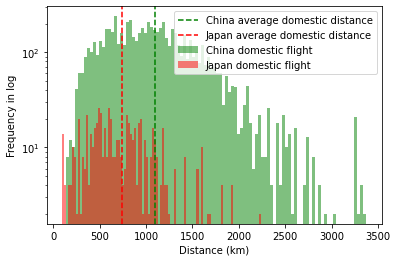

In [12]:
plt.hist(route_dis, bins = 100, color = 'g',alpha = 0.5, label = name.title() + ' domestic flight') #plot the list in green with 1000 bins
plt.hist(route_dis2, bins = 100, color = 'r', alpha = 0.5, label = name2.title() + ' domestic flight')
plt.axvline(mean, color='g', linestyle='dashed', linewidth=1.5, label = name.title() + ' average domestic distance')
plt.axvline(mean2, color='r', linestyle='dashed', linewidth=1.5, label = name2.title() +' average domestic distance')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency in log')
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()